# What are the key trends in Netflix's movie content in terms of release year, genre popularity, and movie durations?

This analysis will explore:
- The frequency of movie releases by year.
- The most popular genres of movies on Netflix.
- The handling and analysis of movie durations, including the replacement of missing values with the average duration.

### Loading & Cleaning the Dataframe

In [ ]:
# Load the dataset as a dataframe:
import pandas as pd
from IPython.display import display

# Load the file

filepath = "/Users/shaniquesmith/Desktop/CFG/ShaniqueSmith_CFGdegree_Data_Exam_Spring2024.ipynb./netflix_titles.csv"
netflix_titles_df = pd.read_csv(filepath)

In [ ]:
# Show the first 10 rows of the dataset
netflix_titles= netflix_titles_df.head(10)
netflix_titles

In [112]:
# Show the last 5 rows
netflix_titles= netflix_titles_df.tail(5)
netflix_titles

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [113]:
# Count the number of rows with no missing values in any of the columns
rows_no_missing_values = netflix_titles_df.dropna().shape[0]
print("\nNumber of rows with no missing values in any column:")
display(rows_no_missing_values)


Number of rows with no missing values in any column:


5332

In [114]:
# Drop everything that is not a 'Movie' and show the resulting data frame
movies_only_df = netflix_titles_df[netflix_titles_df['type'] == 'Movie']
print("Rows with Type 'Movie' Only:")
display(movies_only_df)

Rows with Type 'Movie' Only:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [126]:
# For every movie where the duration is missing, replace it with the average 
# duration of the movies in the dataset and return the resulting data frame
    
# Load the file

filepath = "/Users/shaniquesmith/Desktop/CFG/ShaniqueSmith_CFGdegree_Data_Exam_Spring2024.ipynb./netflix_titles.csv"
netflix_data = pd.read_csv(filepath)

# Define a function to convert duration to numeric minutes
def duration_to_minutes(duration_string):
    if pd.isnull(duration_string):
        return None
    try:
        return float(duration_string.replace(' min', ''))
    except:
        return None

# Apply the function to the 'duration' column to convert it to numeric
netflix_data['duration_numeric'] = netflix_data['duration'].apply(duration_to_minutes)

# Convert NaN values to 0
netflix_data['duration_numeric'].fillna(0, inplace=True)

# Filter out everything that is not a 'Movie'
movies_only_df = netflix_data[netflix_data['type'] == 'Movie'].copy()

# Calculate the average duration for movies (excluding zeros)
average_movie_duration = movies_only_df[movies_only_df['duration_numeric'] != 0]['duration_numeric'].mean()

# Replace zero durations with the average duration
movies_only_df.loc[movies_only_df['duration_numeric'] == 0, 'duration_numeric'] = average_movie_duration

clean_movies = movies_only_df[['title', 'duration', 'duration_numeric']]


print(clean_movies)

# Save the cleaned movies DataFrame to a CSV file
cleaned_movies_filepath = "/Users/shaniquesmith/Desktop/CFG/cleaned_movies.csv"
clean_movies.to_csv(cleaned_movies_filepath, index=False)


                                 title duration  duration_numeric
0                 Dick Johnson Is Dead   90 min              90.0
6     My Little Pony: A New Generation   91 min              91.0
7                              Sankofa  125 min             125.0
9                         The Starling  104 min             104.0
12                        Je Suis Karl  127 min             127.0
...                                ...      ...               ...
8801                           Zinzana   96 min              96.0
8802                            Zodiac  158 min             158.0
8804                        Zombieland   88 min              88.0
8805                              Zoom   88 min              88.0
8806                            Zubaan  111 min             111.0

[6131 rows x 3 columns]


In [116]:
# Check for any duplicates in the data

# Check for duplicate
duplicates = netflix_data[netflix_data.duplicated()]
duplicates

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_numeric


In [117]:
# Rename all columns to start with a capital letter.

netflix_data.columns = [column.capitalize() for column in netflix_data.columns]
netflix_data.columns

Index(['Show_id', 'Type', 'Title', 'Director', 'Cast', 'Country', 'Date_added',
       'Release_year', 'Rating', 'Duration', 'Listed_in', 'Description',
       'Duration_numeric'],
      dtype='object')

### Visualisation

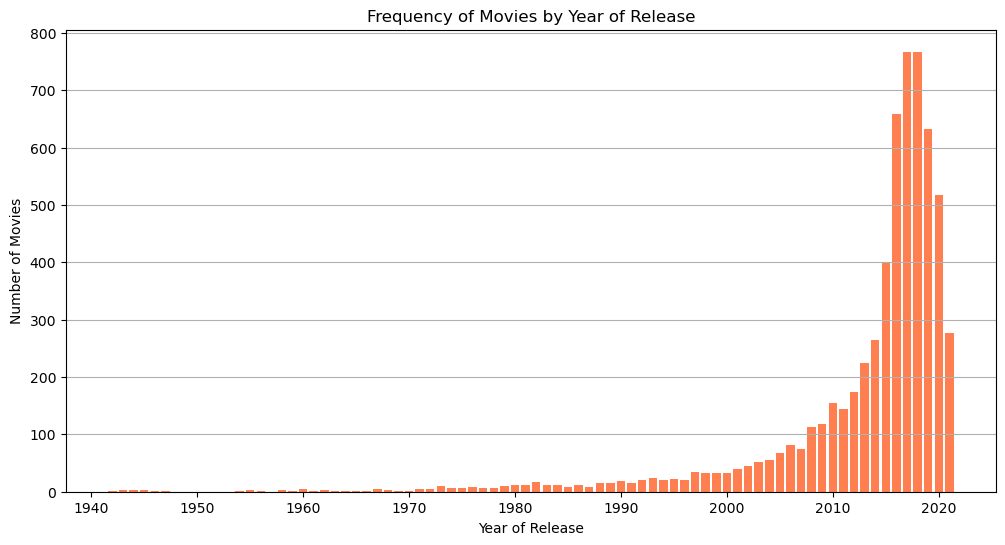

In [7]:
# 1 Visualisation which shows the frequency of movies by year of release.

import matplotlib.pyplot as plt
import pandas as pd 

# Read in file
filepath = "/Users/shaniquesmith/Desktop/CFG/ShaniqueSmith_CFGdegree_Data_Exam_Spring2024.ipynb./netflix_titles.csv"
df = pd.read_csv(filepath)

# Only show movies
movies_df = df[df['type'] == 'Movie']

# Count the number of movies released each year
movies_each_year = movies_df['release_year'].value_counts().sort_index()

# Create the plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(movies_each_year.index, movies_each_year.values, color='coral')
plt.xlabel('Year of Release')
plt.ylabel('Number of Movies')
plt.title('Frequency of Movies by Year of Release')
plt.grid(axis='y')
plt.show()

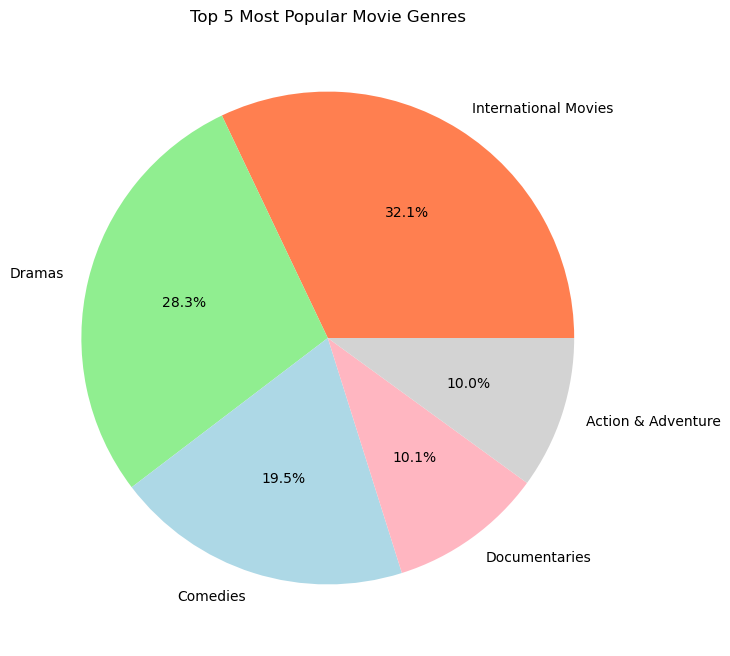

In [8]:
# Pie chart which shows the 5 top most popular genres of the movies in the dataset.
    
import pandas as pd

# Only show movies
movies_df = df[df['type'] == 'Movie']

# Count the movies in each genre
genres = movies_df['listed_in'].str.split(', ', expand=True).stack().value_counts()

# Get the top 5 genres
top_5 = genres.head(5)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_5, labels=top_5.index, autopct='%1.1f%%', colors=['coral', 'lightgreen', 'lightblue', 'lightpink', 'lightgrey'])
plt.title('Top 5 Most Popular Movie Genres')
plt.show()

NUMPY Practise

In [ ]:
# 1 (2 marks). Running the code in this cell throws an error. Why do we get this error
  # and how do we fix it? The code doesnt work because we have not imported the numpy library in order to use to numpy library we first need to import it

# use this numpy array for all exercises in this section
arr = np.array([0, 56, 82, 500, 140, 43, 92, 10, 25, 11, 18, 26, 150, 240, 364, 196])
arr

In [37]:
# 2 (5 marks). How many odd numbers do we have in the array? Show how we get this result using numpy
import numpy as np 
arr = np.array([0, 56, 82, 500, 140, 43, 92, 10, 25, 11, 18, 26, 150, 240, 364, 196])
arr

# Create a boolean array to check for odd number
odd_no = arr % 2 != 0
odd_no


[False False False False False  True False False  True  True False False
 False False False False]


In [39]:
# 3 (5 marks). Replace all odd numbers in arr with 999

# Replace all odd numbers with 999
arr = np.where(arr % 2 != 0, 999, arr)
arr

array([  0,  56,  82, 500, 140, 999,  92,  10, 999, 999,  18,  26, 150,
       240, 364, 196])

In [50]:
# 4 (8 marks). The above is a 1D array. Convert it into a 4D array and reverse its columns.

arr = np.array([  0,  56,  82, 500, 140, 999,  92,  10, 999, 999,  18,  26, 150, 240, 364, 196])

#reshape array from 1d to 4d
fourd_arr = arr.reshape(4,4)
fourd_arr


# Desired output
# > array([[560,  82,  56,   0],
# >        [ 10,  92, 999, 140],
# >        [ 26,  18, 999, 999],
# >        [196, 364, 240, 150]])



array([[  0,  56,  82, 500],
       [140, 999,  92,  10],
       [999, 999,  18,  26],
       [150, 240, 364, 196]])

In [54]:
reversed_arr = np.fliplr(fourd_arr)
reversed_arr

array([[500,  82,  56,   0],
       [ 10,  92, 999, 140],
       [ 26,  18, 999, 999],
       [196, 364, 240, 150]])

In [56]:
# 5 (5 marks). Find and return all values which are higher than 100 and lower or equal than 500.

# Fetch values higher than 100 and lower or equal to 500
more_or_less = arr[(arr > 100) & (arr <= 500)]
more_or_less

array([500, 140, 150, 240, 364, 196])